# Detection of Bright Spots in Images

## Introduction

Computer vision is a field of computer science that focuses on replicating parts of the complexity of the human vision system and enabling computers to identify and process objects in images and videos in the same way that humans do. Thanks to the advances in artificial intelligence and innovations in deep learning and neural networks. The field has been able to take great leaps in recent years and has been able to surpass humans in some tasks related to detecting and labeling objects.

In this project I have detected the bright spot(s) present on an Image computationally. The whole project was done in Python programming language on Google Colab.

The main task was to separate the bright regions in an image from the dark. For that, after we load the image, we will do some pre-processing. Further, we will label the regions of the image based on their pixel values. Finally we will draw the contours to check if our task was successful. We will now see these steps in detail.

## Import all libraries and dependencies

In [1]:
import imutils
from imutils import contours
from skimage import measure
import numpy as np  
import cv2  
from google.colab.patches import cv2_imshow

## Function: Image pre-processing

In [2]:
#Function: Perform Image pre-processing (Convert to grayscaled, apply gaussian filter, threshold the image and perform erosions and dilations)
def Image_Preprocessing(path):
  img = cv2.imread(path)    #Read the image - using OpenCV
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    #Convert the image to grayscaled
  blur = cv2.GaussianBlur(gray, (11, 11), 0)  #Blur the image using Gaussian function of size (11,11)
  thresh = cv2.threshold(blur, 200, 255, cv2.THRESH_BINARY)[1]  #Get the bright regions in image
  thresh1 = cv2.erode(thresh, None, iterations=2)  #Perform erosion on the image
  thresh2 = cv2.dilate(thresh1, None, iterations=4) #perform dilation on the image  
  return thresh2,img

## Function: Label the regions on the image

In [3]:
#Function: Label the regions on the image (as background, bright region etc. Perform CCL to label each component) 
def Label_regions(thresh2,img):
  All_labels = measure.label(thresh2, connectivity=2, background=0) #Perform connected component labeling (use measure.label function for the same)
  mask = np.zeros(thresh2.shape, dtype="uint8") #Mask: Store only the large components
  for label in np.unique(All_labels):
    if label == 0:   #Background: Dark
      continue
    #Construct the mask label and count the #Pixels 
    label_mask = np.zeros(thresh2.shape, dtype="uint8")
    label_mask[All_labels == label] = 255
    Pixels = cv2.countNonZero(label_mask)
    if Pixels > 300:
      mask = cv2.add(mask, label_mask)  #Large bright region
  return mask,img

## Function - Draw contour over the bright spots in the image

In [4]:
def Draw_Spots(mask,img):
  #Find the contours in the mask
  count = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  count = imutils.grab_contours(count)  #
  count = contours.sort_contours(count)[0]  #Sort them from left to right

  #Draw the bright spot(s) on the image
  for (i, c) in enumerate(count):
    ((cX, cY), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(img, (int(cX), int(cY)), int(radius),(0, 0, 255), 3)
  return img

## Function: Call other functions and display the output

In [5]:
def detect_bright_spots(path):
  thresh2,img = Image_Preprocessing(path) #Return thresh2 after pre-processing
  mask,img = Label_regions(thresh2,img) #Get the mask label
  img = Draw_Spots(mask,img) #Using the mask label, draw contours on the bright spots and return the final image
  cv2_imshow(img) #Display the final image which displays the detected bright spots

## Test 1: Image containing only one bulb

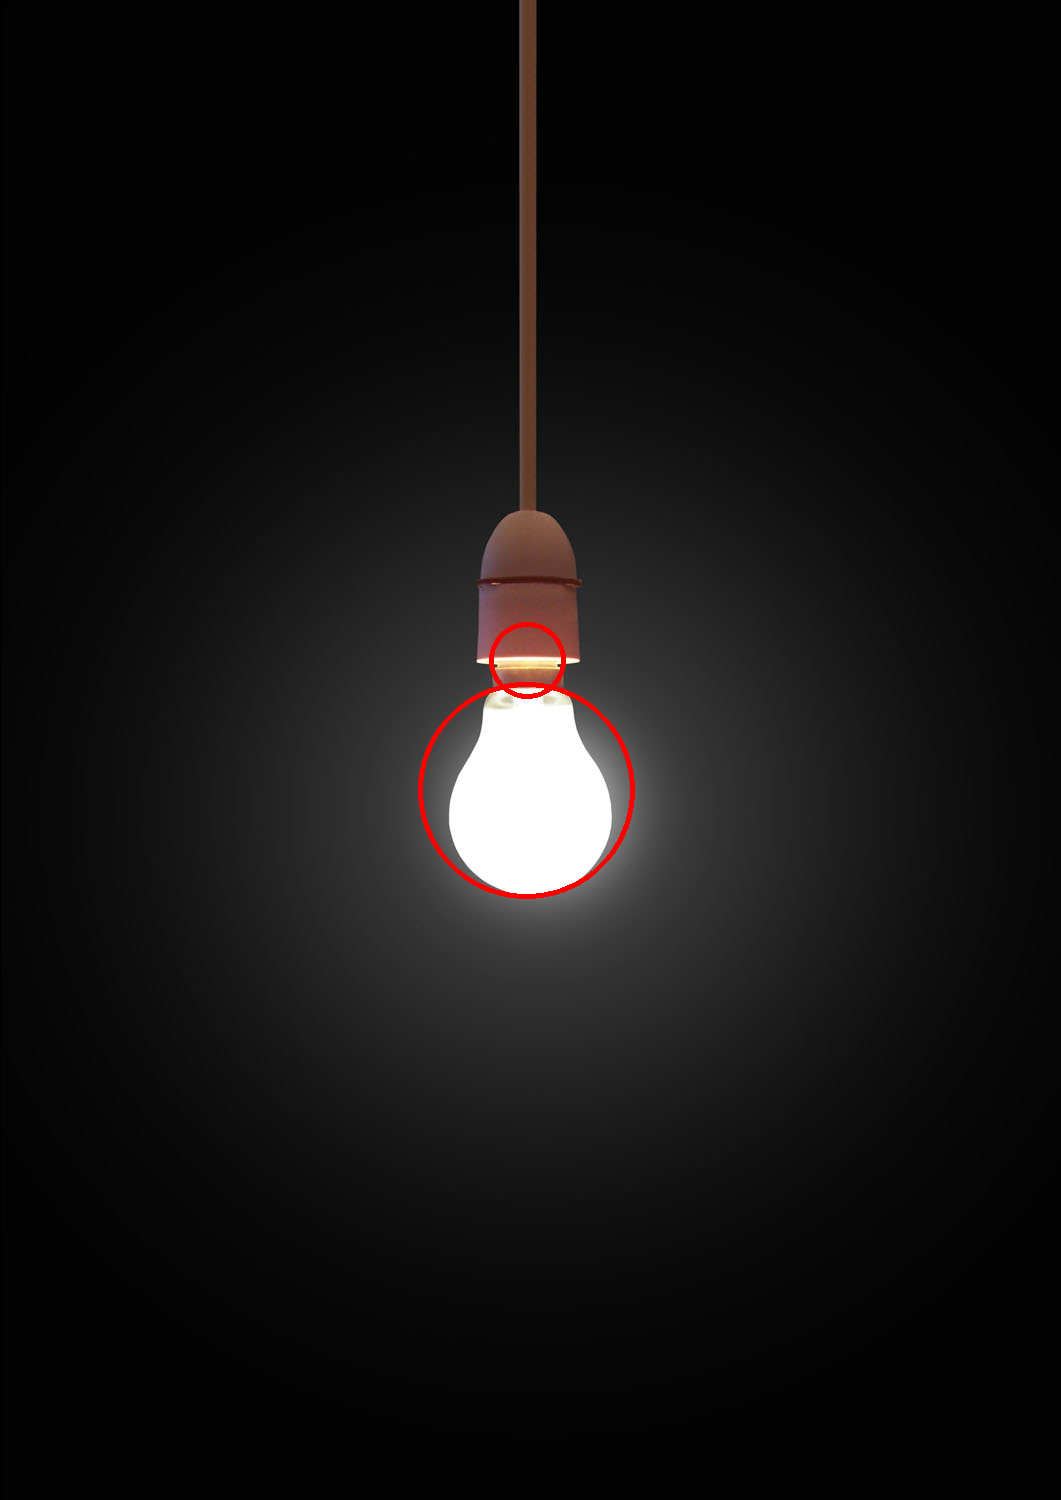

In [6]:
# Let us give an image containing a single bulb. Lets see if bright spot (bulb glow) is being detected. 
detect_bright_spots('/content/Single.jpg')

## Test 2: Image contating multiple bulbs

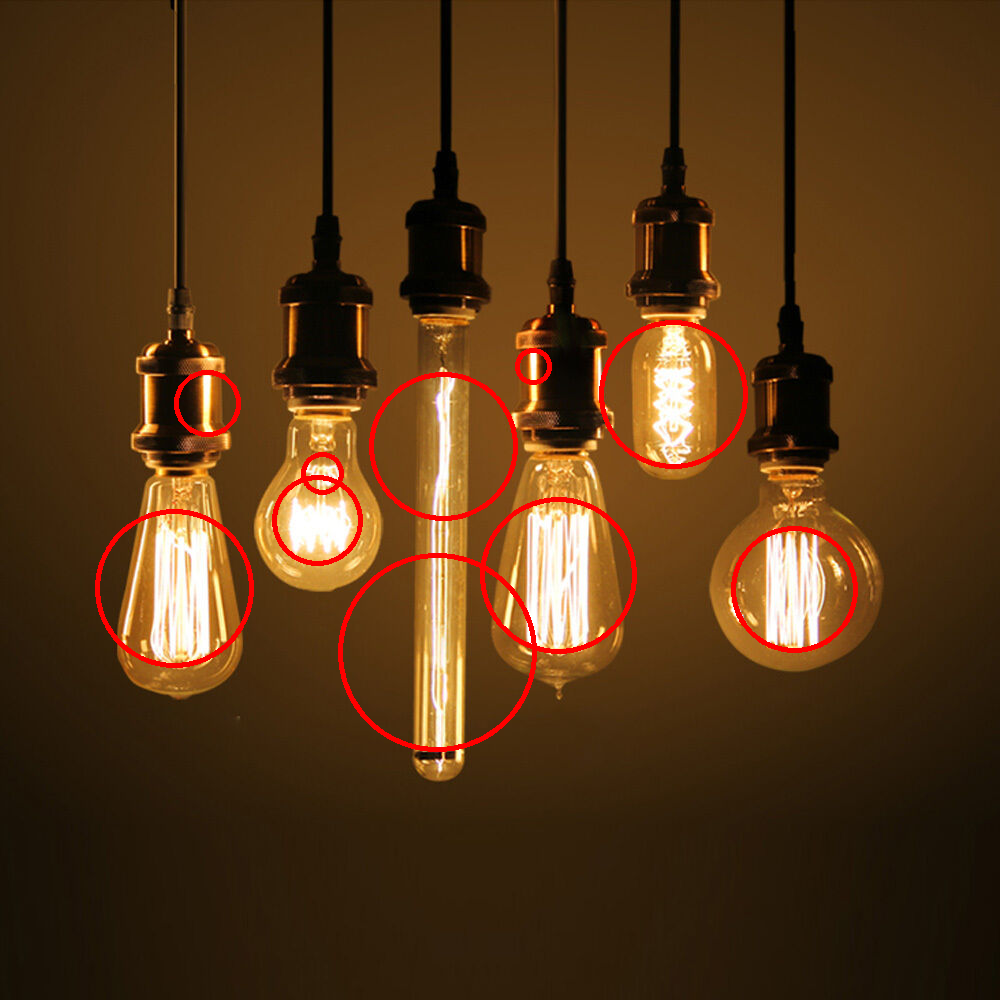

In [7]:
#Let us now give an image with multiple bulbs and check if all the bright spots are getting detected. 
detect_bright_spots('/content/Multiple.jfif')

## Summary
The whole project was based on analysing the image after separating bright pixels from dark pixels. To detect the bright regions in an image, we have first loaded our image. Further, it was converted to grayscale and smoothened using Gaussian filter. By smoothening, we are actually blurring the image so that high frequency noise reduces. We then perform thresholding followed by series of erosions and dilations. Connected Componenet analysis is then performed to label the regions on the image. Once we get to know the bright and dark areas on an image, we will draw the contours on it for us to visualize.